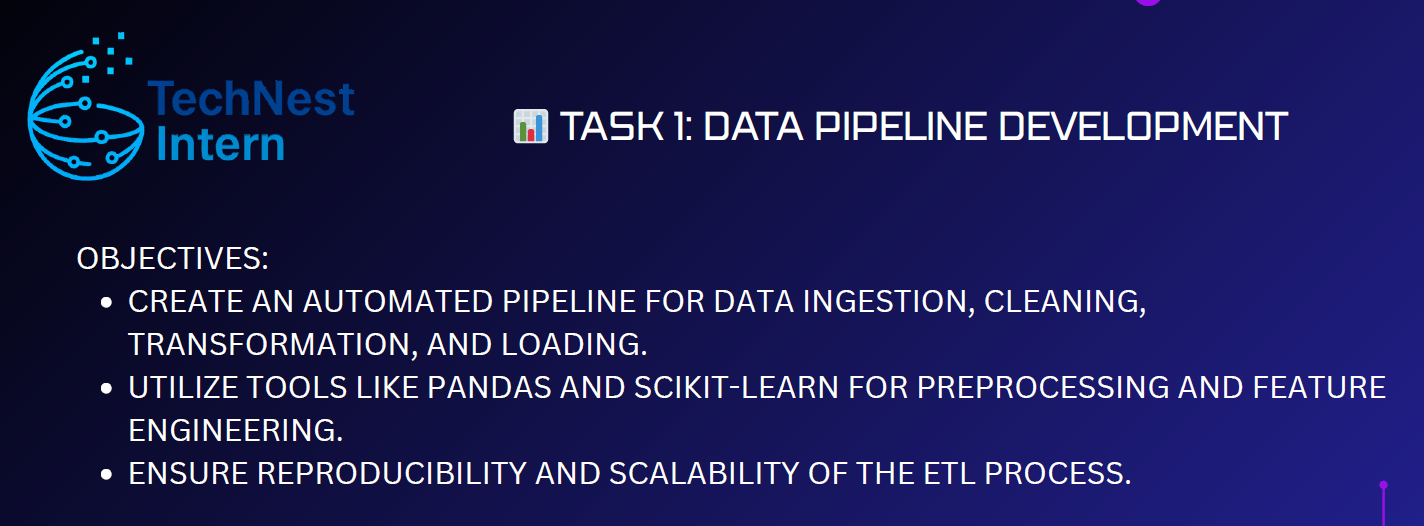

# Required Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder,StandardScaler

# ETL Pipeline

In [37]:
# creating function for loading the dataset
def load_data(file_path):
  return pd.read_csv(file_path)

# preprocessing pipeline for imputation, encoding and scaling
def preprocessing_pipeline(numerical_features, categorical_features):
    cat_pipeline = Pipeline(steps=[
        ('encoder',OneHotEncoder(handle_unknown='ignore')),
        ('imputer',SimpleImputer(strategy='most_frequent'))
    ])
    num_pipeline = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='mean')),
        ('scaler',StandardScaler())
    ])
    preprocessor = ColumnTransformer(transformers=[
        ('cat',cat_pipeline,categorical_features),
        ('num',num_pipeline,numerical_features)
    ])

    return preprocessor

# ETL pipeline and providing the output dataset with can directly used for model building
def etl_pipeline(file_path):

    data = load_data(file_path)
    categorical_features = ['Pclass','Sex','Embarked']
    numerical_features = ['Age','Fare']

    # preprocessing pipeline
    preprocessor = preprocessing_pipeline(numerical_features,categorical_features)
    # splitting the dataset into features and labels
    features = data.drop('Survived',axis=1)
    labels = data['Survived']
    # using preprocessor
    features_ = preprocessor.fit_transform(features)
    # DataFrame
    processed_dataset = pd.DataFrame(features_)
    processed_dataset['Survived'] = labels
    # Output Dataset
    processed_dataset.to_csv('processed_data.csv', index=False)
    return processed_dataset

# Implementing Pipeline

In [36]:
processed = etl_pipeline('/content/Titanic-Dataset.csv')
processed

,0,1,2,3,4,5,6,7,8,9,10,Survived
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.592481,-0.502445,0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.638789,0.786845,1
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.284663,-0.488854,1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.407926,0.420730,1
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.407926,-0.486337,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.207709,-0.386671,0
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.823344,-0.044381,1
888,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,-0.176263,0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.284663,-0.044381,1
